In [62]:
import networkx as nx
import numpy as np
from gensim.models import Word2Vec
import random

In [47]:
# we compute probabilties for each node because It'll help Biased Random walk
# Some conditions -->
# for each node
# 1) probability to move back to previously traversed node is 1/p
# 2) probability to move to new untraversed node is 1/q
# 3) probability to mode to new untraversed node which is at the same distance from the previously traversed node of current node is 1


def compute_probablities(graph,probs, p, q):
  """
  graph : expects graph 
  probs : expects empty dictionary to compute probabilties of all the neigbhoring nodes of a node
        : this is of the format   source node : probabilites : n1 : probability score
                                                               n2 : probability score
                                                               n3 : probability score  
    p   : return parameter
    q   : in-out parameter
  """
  
  # for each node we will compute its probability to move to next node
  # we start traversal for each node in the graph
  # for source in graph.nodes():
  for source in [0]:

    # get all the neighbors on source node
    for current_node in graph.neighbors(source):
      probs_ = []
      # get all the neighbors of current node   this will be the 2nd node in a traversal if think of in terms of traversal
      for destination in graph.neighbors(current_node):

        # if source is destination --> came back to previously traversed node
        if source == destination:
          # get the edge weight and multiply it with probability
          prob_ = graph[current_node][destination].get('weight', 1) * (1/p) 


        # if there is a neigbor of current node which is also the neighbor of source node
        elif destination in graph.neighbors(source):
          prob_ = graph[current_node][destination].get('weight', 1)
        
        # otherwise for all other nodes do this
        else:
          prob_ = graph[current_node][destination].get('weight', 1) * (1/q)

        # for each neighbor of current node , their probability
        probs_.append(prob_)
      

      # normalizing the probabilities
      probs[source]['probabilities'][current_node] = probs_/np.sum(probs_)
  
  return probs
        

In [44]:
# generate biased random walks

def generated_random_walks(graph, probs, max_walks, walk_len):
  """
  graph : expects graph
  probs : computed probabilities
  max_walks : number of max walks per node
  walk_len :  length of walk for each node
  """
  walks = []
  # for start_node in graph.nodes():
  for start_node in [0]:
    for _ in range(max_walks):

      walk = [start_node]
      walk_options = list(graph[start_node])
      if len(walk_options) ==0:
        break
      
      first_step = np.random.choice(walk_options)
      walk.append(first_step)

      for _ in range(walk_len - 2):
        walk_options = list(graph[walk[-1]])
        if len(walk_options) == 0:
          break
        
        probabilities = probs[walk[-2]]['probabilities'][walk[-1]]
        next_stop = np.random.choice(walk_options, p=probabilities)
        walk.append(next_stop)

      walks.append(walk)

  np.random.shuffle(walks)
  walks = [list(map(str, walk)) for walk in walks]
  return walks
      


In [65]:
# craete the main Node2Vec function which will take the walk vectors and return the node embeddings
import gensim 
def Node2vec(generated_walks, window_size, embedding_vector_dim):
  """
  generated_walks : list_walks
  window_size : define window size for list of nodes
  embedding_vector_size : what embedding vector size you want
  """
  model = Word2Vec(sentences= generated_walks, window= window_size, size= embedding_vector_dim)
  return model.wv


In [7]:
# import the karate club graph

graph = nx.karate_club_graph()


In [21]:
from collections import defaultdict

probs = defaultdict(dict)

for node in graph.nodes():
  probs[node]['probabilities'] = dict()


In [22]:
probs

defaultdict(dict,
            {0: {'probabilities': {}},
             1: {'probabilities': {}},
             2: {'probabilities': {}},
             3: {'probabilities': {}},
             4: {'probabilities': {}},
             5: {'probabilities': {}},
             6: {'probabilities': {}},
             7: {'probabilities': {}},
             8: {'probabilities': {}},
             9: {'probabilities': {}},
             10: {'probabilities': {}},
             11: {'probabilities': {}},
             12: {'probabilities': {}},
             13: {'probabilities': {}},
             14: {'probabilities': {}},
             15: {'probabilities': {}},
             16: {'probabilities': {}},
             17: {'probabilities': {}},
             18: {'probabilities': {}},
             19: {'probabilities': {}},
             20: {'probabilities': {}},
             21: {'probabilities': {}},
             22: {'probabilities': {}},
             23: {'probabilities': {}},
             24: {'probabilities

In [31]:
computed_probabilities = compute_probablities(graph, probs, 1, 1)

walks = generated_random_walks(graph, computed_probabilities, 5, 10)

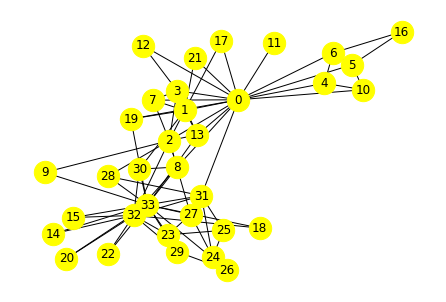

In [37]:
nx.draw(graph, with_labels = True, node_color="yellow", node_size=500)

In [39]:
graph.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [40]:
graph.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

In [ ]:
computed_probabilities

In [66]:
# generate embeddings

n2v_embed = Node2vec(walks, 20, 20)